# Supervised Learning CW2

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

### 1. Basic Results

Load files.

In [2]:
# load zipcombo
zipcombo_data = np.loadtxt('zipcombo.dat')
digits_data = zipcombo_data[:, 0]  # First column contains the digit labels
pixels_data = zipcombo_data[:, 1:]  # Remaining columns contain the pixel values

In [3]:
# labels
digits_data.shape

(9298,)

In [4]:
# data
pixels_data.shape

(9298, 256)

Testing whether digit and pixel data match for 1st data point.

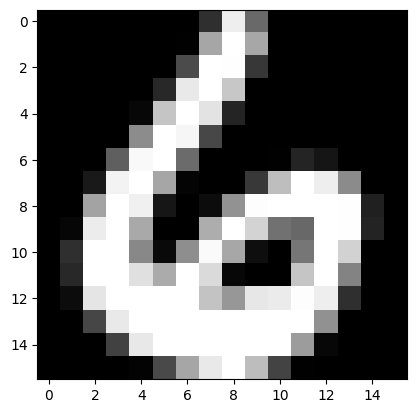

In [5]:
plt.imshow(pixels_data[0, :].reshape(16, 16), cmap='gray')

In [6]:
digits_data[0]

6.0

As can be observed, we loaded the data appropriately, first digit is 6 which is also the first row of pixel_data.

We now implement the One VS All Kernel Perceptron which we will use to classify data into one of k classes.

In [9]:
class OneVSAllPolynomialKernelPerceptron:
    def __init__(self, classes, polynomialDegree):
        self.classes = classes
        self.polynomialDegree = polynomialDegree
        self.alphas = None
        self.XTrain = None

    def _polynomialKernel(self, p, q, d):
        return (np.dot(p, q)) ** d

    def _getKMatrixPolynomial(self, XTrain, degree):
        num_samples, num_features = XTrain.shape
        K = np.zeros((num_samples, num_samples))
        for i in range(num_samples):
            for j in range(num_samples):
                K[i, j] = self._polynomialKernel(XTrain[i, :], XTrain[j, :], degree)
        return K
    
    def _computeScoreForEachClassifier(self, alphas, matrixK, sampleIdx):
        return np.dot(alphas, matrixK[:, sampleIdx])
    
    def _getKMatrixPolynomialTest(self, XTrain, XTest, degree):
        num_samples, num_features = XTrain.shape
        num_samples_test, num_features_test = XTest.shape
        K = np.zeros((num_samples, num_samples_test))
        for i in range(num_samples):
            for j in range(num_samples_test):
                K[i, j] = self._polynomialKernel(XTrain[i, :], XTest[j, :], degree)
        return K
    
    def _sign(self, x):
        return -1 if x < 0 else 1
    
    def train(self, XTrain, yTrain, max_epochs=10, error_change_threshold=1e-4):
        num_samples, num_features = XTrain.shape
        # each row in alpha represents the coefficients for a separate classifer
        # k by m
        self.alphas = np.zeros((self.classes, num_samples))
        self.XTrain = XTrain

        matrixK = self._getKMatrixPolynomial(XTrain, self.polynomialDegree)
        trainErrorPerEpochList = []

        for epoch in range(max_epochs):
            mistakes = 0
            for i in range(num_samples):
                actualClassLabel = yTrain[i]

                preds = self._computeScoreForEachClassifier(self.alphas, matrixK, i)

                maxConfidence = float('-inf')
                maxConfidenceClass = -1

                for j in range(self.classes):
                    yTrue = 1 if actualClassLabel == j else -1

                    # update alphas in case of misclassification for class j
                    if yTrue * preds[j] <= 0:
                        self.alphas[j, i] = self.alphas[j, i] - self._sign(preds[j])

                    # update max confidence
                    if preds[j] > maxConfidence:
                        maxConfidence = preds[j]
                        maxConfidenceClass = j

                if maxConfidenceClass != actualClassLabel:
                    mistakes += 1

            trainErrorPerEpoch = mistakes / num_samples
            trainErrorPerEpochList.append(trainErrorPerEpoch)
            print("Epoch: {}, Train Error: {}".format(epoch, trainErrorPerEpoch))
            
            # early stopping condition based on error change threshold
            if epoch > 0 and abs(trainErrorPerEpoch - trainErrorPerEpochList[epoch - 1]) < error_change_threshold:
                print(f"Stopping early as convergence achieved at epoch {epoch}.")
                break

        return trainErrorPerEpochList[-1]

    def test(self, Xtest, yTest):
        num_samples, num_features = Xtest.shape
        matrixK = self._getKMatrixPolynomialTest(self.XTrain, Xtest, self.polynomialDegree)
        mistakes = 0

        for i in range(num_samples):
            actualClassLabel = yTest[i]
            preds = self._computeScoreForEachClassifier(self.alphas, matrixK, i)
            maxConfidenceClass = np.argmax(preds)

            if maxConfidenceClass != actualClassLabel:
                mistakes += 1

        testError = mistakes / num_samples

        return testError

We now compute the basic results for question 3.1.

In [10]:
numClasses = 10
degrees = [i for i in range(1, 8)]

# keep track of train and test errors for each degree to later compute mean and std
allTrainErrorsForEachDegree = []
allTestErrorsForEachDegree = []

for deg in degrees:
    curTrainErrors = []
    curTestErrors = []

    for run in range(20):
        XTrain, XTest, yTrain, yTest = train_test_split(pixels_data, digits_data, test_size=0.2)

        model = OneVSAllPolynomialKernelPerceptron(numClasses, deg)
        trainError = model.train(XTrain, yTrain)
        testError = model.test(XTest, yTest)

        curTrainErrors.append(trainError)
        curTestErrors.append(testError)
    
    allTrainErrorsForEachDegree.append(curTrainErrors)
    allTestErrorsForEachDegree.append(curTestErrors)

Epoch: 0, Train Error: 0.14076364614143588
Epoch: 1, Train Error: 0.09787577305727346
Epoch: 2, Train Error: 0.08779241731648292
Epoch: 3, Train Error: 0.08187684861521914
Epoch: 4, Train Error: 0.07555794568432374
Epoch: 5, Train Error: 0.07125571390158644
Epoch: 6, Train Error: 0.06883570852379672
Epoch: 7, Train Error: 0.07018015595590213
Epoch: 8, Train Error: 0.06802904006453347
Epoch: 9, Train Error: 0.06439903199784888
Epoch: 0, Train Error: 0.14479698843775207
Epoch: 1, Train Error: 0.09989244420543157
Epoch: 2, Train Error: 0.09007797795106211
Epoch: 3, Train Error: 0.08429685399300887
Epoch: 4, Train Error: 0.08026351169669266
Epoch: 5, Train Error: 0.07770906157569239
Epoch: 6, Train Error: 0.07004571121269158
Epoch: 7, Train Error: 0.0754235009411132
Epoch: 8, Train Error: 0.06735681634848077
Epoch: 9, Train Error: 0.07058349018553374
Epoch: 0, Train Error: 0.14372143049206776
Epoch: 1, Train Error: 0.09653132562516806
Epoch: 2, Train Error: 0.08792686205969347
Epoch: 3, Tr

In [11]:
# calculate mean and standard deviation for train and test errors for each degree
# display results
meanTrainErrorsForEachDegree = [np.mean(errors) for errors in allTrainErrorsForEachDegree]
stdTrainErrorsForEachDegree = [np.std(errors) for errors in allTrainErrorsForEachDegree]
meanTestErrorsForEachDegree = [np.mean(errors) for errors in allTestErrorsForEachDegree]
stdTestErrorsForEachDegree = [np.std(errors) for errors in allTestErrorsForEachDegree]

# note the values displayed are not percentages (should you want the percentage, multiply by 100)
for deg in degrees:
    print(f"Degree: {deg}, Mean Train Error: {meanTrainErrorsForEachDegree[deg - 1]}, Std Train Error: {stdTrainErrorsForEachDegree[deg - 1]}, Mean Test Error: {meanTestErrorsForEachDegree[deg - 1]}, Std Test Error: {stdTestErrorsForEachDegree[deg - 1]}")

Degree: 1, Mean Train Error: 0.06866093035762301, Std Train Error: 0.0025934596569471007, Mean Test Error: 0.08803763440860216, Std Test Error: 0.011082150226730396
Degree: 2, Mean Train Error: 0.0026351169669265933, Std Train Error: 0.0007562442113700044, Mean Test Error: 0.03303763440860215, Std Test Error: 0.0038337329565936076
Degree: 3, Mean Train Error: 0.0009007797795106212, Std Train Error: 0.0005173939608737256, Mean Test Error: 0.030188172043010754, Std Test Error: 0.00330229654127633
Degree: 4, Mean Train Error: 0.0006050013444474321, Std Train Error: 0.00030212698378924755, Mean Test Error: 0.02801075268817204, Std Test Error: 0.005671724498013104
Degree: 5, Mean Train Error: 0.0004033342296316213, Std Train Error: 0.00021678563453343775, Mean Test Error: 0.030645161290322583, Std Test Error: 0.01098275379978575
Degree: 6, Mean Train Error: 0.0003159451465447701, Std Train Error: 0.00014895482526324508, Mean Test Error: 0.02731182795698924, Std Test Error: 0.003765744302760

### 2. Cross-Validation, 3. Confusion Matrix, 4. Hardest To Predict Images

Note for the rest of the code, I reduced the number of epochs to 2 due to computational purposes as it took very long to run the previous code for 10 epochs (approximately 1 day), and here, in this case, we are also doing 5-fold cross-validation.

In [63]:
def createFolds(XTrain, numFolds):
    # function to create my own folds
    num_samples, num_features = XTrain.shape
    foldSize = num_samples // numFolds
    indices = np.arange(num_samples)

    foldsRes = []
    for i in range(numFolds):
        start = i * foldSize
        end = (i+1) * foldSize
        validationIndices = indices[start:end]
        trainIndices = np.concatenate((indices[:start], indices[end:]))
        foldsRes.append((trainIndices, validationIndices))

    return foldsRes

In [64]:
def computeErrorRateForEachCell(confusionMatrix):
    # function to compute error rate for each cell in confusion matrix
    # error rate = cell value / sum of row
    num_classes = len(confusionMatrix)
    errorRateMatrix = np.zeros((num_classes, num_classes))

    for i in range(num_classes):
        row_sum = np.sum(confusionMatrix[i])
        if row_sum != 0:
            errorRateMatrix[i] = confusionMatrix[i] / row_sum
        else:
            # Handle zero-sum row
            errorRateMatrix[i] = confusionMatrix[i] / 1  # Dividing by 1 to avoid division by zero
    
    return errorRateMatrix

In [68]:
# we make a variant of our previous class so that
# we compute the confusion matrix and wrong classifications too
# only difference from previous class will be the test method since
# we need to return the confusion matrix and wrong classifications
class OneVSAllPolynomialKernelPerceptronV2:
    def __init__(self, classes, polynomialDegree):
        self.classes = classes
        self.polynomialDegree = polynomialDegree
        self.alphas = None
        self.XTrain = None

    def _polynomialKernel(self, p, q, d):
        return (np.dot(p, q)) ** d

    def _getKMatrixPolynomial(self, XTrain, degree):
        num_samples, num_features = XTrain.shape
        K = np.zeros((num_samples, num_samples))
        for i in range(num_samples):
            for j in range(num_samples):
                K[i, j] = self._polynomialKernel(XTrain[i, :], XTrain[j, :], degree)
        return K
    
    def _computeScoreForEachClassifier(self, alphas, matrixK, sampleIdx):
        return np.dot(alphas, matrixK[:, sampleIdx])
    
    def _getKMatrixPolynomialTest(self, XTrain, XTest, degree):
        num_samples, num_features = XTrain.shape
        num_samples_test, num_features_test = XTest.shape
        K = np.zeros((num_samples, num_samples_test))
        for i in range(num_samples):
            for j in range(num_samples_test):
                K[i, j] = self._polynomialKernel(XTrain[i, :], XTest[j, :], degree)
        return K
    
    def _sign(self, x):
        return -1 if x < 0 else 1
    
    def train(self, XTrain, yTrain, max_epochs=10, error_change_threshold=1e-4):
        num_samples, num_features = XTrain.shape
        # each row in alpha represents the coefficients for a separate classifer
        # k * m
        self.alphas = np.zeros((self.classes, num_samples))
        self.XTrain = XTrain

        matrixK = self._getKMatrixPolynomial(XTrain, self.polynomialDegree)
        trainErrorPerEpochList = []

        for epoch in range(max_epochs):
            mistakes = 0
            for i in range(num_samples):
                actualClassLabel = yTrain[i]

                preds = self._computeScoreForEachClassifier(self.alphas, matrixK, i)

                maxConfidence = float('-inf')
                maxConfidenceClass = -1

                for j in range(self.classes):
                    yTrue = 1 if actualClassLabel == j else -1

                    # update alphas in case of misclassification for class j
                    if yTrue * preds[j] <= 0:
                        self.alphas[j, i] = self.alphas[j, i] - self._sign(preds[j])

                    # update max confidence
                    if preds[j] > maxConfidence:
                        maxConfidence = preds[j]
                        maxConfidenceClass = j

                if maxConfidenceClass != actualClassLabel:
                    mistakes += 1

            trainErrorPerEpoch = mistakes / num_samples
            trainErrorPerEpochList.append(trainErrorPerEpoch)
            print("Epoch: {}, Train Error: {}".format(epoch, trainErrorPerEpoch))
            
            # early stopping condition based on error change threshold
            if epoch > 0 and abs(trainErrorPerEpoch - trainErrorPerEpochList[epoch - 1]) < error_change_threshold:
                print(f"Stopping early as convergence achieved at epoch {epoch}.")
                break

        return trainErrorPerEpochList[-1]

    def test(self, Xtest, yTest):
        # we also compute the confusion matrix and wrong classifications
        num_samples, num_features = Xtest.shape
        matrixK = self._getKMatrixPolynomialTest(self.XTrain, Xtest, self.polynomialDegree)
        mistakes = 0
        wrongClassifications = np.zeros(num_samples)
        confusionMatrix = np.zeros((self.classes, self.classes))

        for i in range(num_samples):
            actualClassLabel = yTest[i]
            preds = self._computeScoreForEachClassifier(self.alphas, matrixK, i)
            maxConfidenceClass = np.argmax(preds)

            if maxConfidenceClass != actualClassLabel:
                mistakes += 1
                wrongClassifications[i] += 1
                confusionMatrix[int(actualClassLabel), maxConfidenceClass] += 1

        testError = mistakes / num_samples

        return testError, wrongClassifications, confusionMatrix

2. Cross-validation. We now do 5-fold cross-validation. Note we run the perceptron classifier for 2 epochs instead of 10 as it would take too long to run otherwise. We should be getting 20 degree* (i.e., best degree parameter) and 20 test errors. Note since we run this for 2 epochs, the results may be slightly different than what we could expect if I run the code for 10 epochs.

In [69]:
numClasses = 10
degrees = [i for i in range(1, 8)]

degreeStarsData = [] # list of tuples (degreeStar, testError)
confusionMatricesForEachRun = [] # list of confusion matrices for each run
errorRateMatricesForEachRun = [] # list of confusion error rate matrices for each run
misclassificationCountByDegStarOnAllData = np.zeros(pixels_data.shape[0]) # keeps track of misclassification count for each image for d*

for run in range(20):

    meanErrorsPerDegree = [] # we will use this to find d* i.e., look for best mean validation error

    XTrain, XTest, yTrain, yTest = train_test_split(pixels_data, digits_data, test_size=0.2)

    # note we get 20 d*s
    for deg in degrees:

        curTrainErrorsListForDeg = [] # contains train errors for each fold iteration (specific to each degree)
        curValidationErrorsListForDeg = [] # contains validation errors for each fold iteration (specific to each degree)

        folds = createFolds(XTrain, 5)
        for trainIndices, validationIndices in folds:
            XTrainFold = XTrain[trainIndices]
            yTrainFold = yTrain[trainIndices]
            XValidationFold = XTrain[validationIndices]
            yValidationFold = yTrain[validationIndices]

            model = OneVSAllPolynomialKernelPerceptronV2(numClasses, deg)
            trainError = model.train(XTrainFold, yTrainFold, max_epochs=2)
            validationError, wrongClassifications, confusionMatrix = model.test(XValidationFold, yValidationFold)

            curTrainErrorsListForDeg.append(trainError)
            curValidationErrorsListForDeg.append(validationError)

        meanErrorsPerDegree.append(np.mean(curValidationErrorsListForDeg))
        print(f"Run: {run}, Degree: {deg}, Mean Validation Error: {np.mean(curValidationErrorsListForDeg)}")

    degStar = np.argmin(meanErrorsPerDegree) + 1 # get best d* for this run

    model = OneVSAllPolynomialKernelPerceptronV2(numClasses, degStar)

    trainError = model.train(XTrain, yTrain, max_epochs=2)
    testError, wrongClassifications, confusionMatrix = model.test(XTest, yTest)
    degreeStarsData.append((degStar, testError))

    # also test d* on entire dataset to look for the images who are wrongly classified the most
    testErrorEntireData, wrongClassificationsEntireData, confusionMatrixEntireData = model.test(pixels_data, digits_data)
    misclassificationCountByDegStarOnAllData += wrongClassificationsEntireData

    # compute error rate for each cell
    confusionMatricesForEachRun.append(confusionMatrix)
    errorRateMatrix = computeErrorRateForEachCell(confusionMatrix)
    errorRateMatricesForEachRun.append(errorRateMatrix)

Epoch: 0, Train Error: 0.14703411191396404
Epoch: 1, Train Error: 0.09662241640060494
Epoch: 0, Train Error: 0.14804234582423123
Epoch: 1, Train Error: 0.09578222147538229
Epoch: 0, Train Error: 0.1545958662409679
Epoch: 1, Train Error: 0.10115946899680726
Epoch: 0, Train Error: 0.15056293059989917
Epoch: 1, Train Error: 0.09813476726600572
Epoch: 0, Train Error: 0.15056293059989917
Epoch: 1, Train Error: 0.10015123508654007
Run: 0, Degree: 1, Mean Validation Error: 0.10907868190988568
Epoch: 0, Train Error: 0.09830280625105024
Epoch: 1, Train Error: 0.031759368173416236
Epoch: 0, Train Error: 0.09712653335573854
Epoch: 1, Train Error: 0.03259956309863889
Epoch: 0, Train Error: 0.10267181986220804
Epoch: 1, Train Error: 0.033271719038817
Epoch: 0, Train Error: 0.10132750798185179
Epoch: 1, Train Error: 0.03646445975466308
Epoch: 0, Train Error: 0.10048731305662914
Epoch: 1, Train Error: 0.0354562258443959
Run: 0, Degree: 2, Mean Validation Error: 0.06455951580363148
Epoch: 0, Train Err

C:\Users\anabi\AppData\Local\Temp\ipykernel_25816\1314522730.py:7: RuntimeWarning: invalid value encountered in divide
  errorRateMatrix = np.nan_to_num(confusionMatrix / rowSums)


Epoch: 0, Train Error: 0.15913291883717023
Epoch: 1, Train Error: 0.09964711813140649
Epoch: 0, Train Error: 0.1517392034952109
Epoch: 1, Train Error: 0.1025037808771635
Epoch: 0, Train Error: 0.14989077465972106
Epoch: 1, Train Error: 0.09796672828096119
Epoch: 0, Train Error: 0.152411359435389
Epoch: 1, Train Error: 0.10317593681734162
Epoch: 0, Train Error: 0.15106704755503278
Epoch: 1, Train Error: 0.09964711813140649
Run: 6, Degree: 1, Mean Validation Error: 0.10020174848688634
Epoch: 0, Train Error: 0.096958494370694
Epoch: 1, Train Error: 0.03764073264997479
Epoch: 0, Train Error: 0.09981515711645102
Epoch: 1, Train Error: 0.032767602083683414
Epoch: 0, Train Error: 0.10099143001176272
Epoch: 1, Train Error: 0.03394387497899513
Epoch: 0, Train Error: 0.09981515711645102
Epoch: 1, Train Error: 0.03780877163501933
Epoch: 0, Train Error: 0.10115946899680726
Epoch: 1, Train Error: 0.03680053772475214
Run: 6, Degree: 2, Mean Validation Error: 0.049361129791526556
Epoch: 0, Train Erro

Let's look at the results for cross-validation.

In [91]:
# We print all the degree*
print("Degrees* Data")
curIdx = 1
for deg, error in degreeStarsData:
    print(f"Run: {curIdx}, Degree* (best degree parameter): {deg}, Test Error: {error}")
    curIdx += 1

Degrees* Data
Run: 1, Degree* (best degree parameter): 5, Test Error: 0.030107526881720432
Run: 2, Degree* (best degree parameter): 4, Test Error: 0.03387096774193549
Run: 3, Degree* (best degree parameter): 6, Test Error: 0.02849462365591398
Run: 4, Degree* (best degree parameter): 6, Test Error: 0.032795698924731186
Run: 5, Degree* (best degree parameter): 4, Test Error: 0.03333333333333333
Run: 6, Degree* (best degree parameter): 6, Test Error: 0.031720430107526884
Run: 7, Degree* (best degree parameter): 7, Test Error: 0.030107526881720432
Run: 8, Degree* (best degree parameter): 7, Test Error: 0.03225806451612903
Run: 9, Degree* (best degree parameter): 6, Test Error: 0.031720430107526884
Run: 10, Degree* (best degree parameter): 6, Test Error: 0.02956989247311828
Run: 11, Degree* (best degree parameter): 6, Test Error: 0.03924731182795699
Run: 12, Degree* (best degree parameter): 5, Test Error: 0.031720430107526884
Run: 13, Degree* (best degree parameter): 6, Test Error: 0.031182

In [92]:
# compute mean d* with std and mean test error with std
allDegreeStars = [res[0] for res in degreeStarsData]
meanDStar = np.mean(allDegreeStars)
stdDStar = np.std(allDegreeStars)

testErrorsForDegStar = [res[1] for res in degreeStarsData]
meanTestErrorForDegStar = np.mean(testErrorsForDegStar)
stdTestErrorForDegStar = np.std(testErrorsForDegStar)

print(f"Mean d*: {meanDStar}, Std d*: {stdDStar}, Mean Test Error: {meanTestErrorForDegStar}, Std Test Error: {stdTestErrorForDegStar}")

Mean d*: 5.65, Std d*: 0.9630680142129111, Mean Test Error: 0.0321505376344086, Std Test Error: 0.0029081996422147356


3. Confusion Matrix and Error Rates. Let's have a look a the the results. We need to report a 10 by 10 matrix where each cell contains a confusion error rate and its standard deviation.

In [77]:
confusionMatricesForEachRun

[array([[0., 0., 1., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 2., 0., 0., 0.],
        [1., 1., 0., 0., 0., 0., 0., 1., 1., 1.],
        [1., 1., 2., 0., 0., 1., 0., 0., 1., 0.],
        [0., 6., 2., 0., 0., 2., 5., 0., 1., 1.],
        [3., 0., 0., 2., 0., 0., 0., 0., 0., 1.],
        [1., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 2., 0., 0., 0., 0., 0.],
        [0., 1., 2., 3., 0., 3., 0., 0., 0., 0.],
        [0., 0., 1., 0., 1., 0., 0., 1., 1., 0.]]),
 array([[0., 0., 0., 1., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 1., 0., 2., 0., 0., 0., 0.],
        [0., 0., 0., 3., 1., 1., 0., 3., 0., 0.],
        [0., 0., 0., 0., 0., 2., 0., 1., 1., 0.],
        [1., 1., 0., 3., 0., 0., 0., 0., 0., 3.],
        [1., 0., 2., 4., 0., 0., 1., 1., 0., 0.],
        [1., 0., 0., 0., 2., 1., 0., 0., 1., 0.],
        [0., 0., 0., 1., 1., 1., 0., 0., 0., 2.],
        [2., 0., 0., 2., 1., 3., 0., 3., 0., 0.],
        [0., 0., 0., 0., 3., 1., 0., 3., 1., 0.]

In [100]:
# note I had to run the line denoted as (*), as I had to slightly modify the computeErrorRateForEachCell function
# to handle zero-sum rows. Note this issue got fixed so now it is not necessary.
# (*) errorRateMatricesForEachRun = [computeErrorRateForEachCell(confusionMatrix) for confusionMatrix in confusionMatricesForEachRun]
errorRateMatricesForEachRun

[array([[0.        , 0.        , 0.5       , 0.        , 0.        ,
         0.5       , 0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.33333333, 0.        , 0.        ,
         0.        , 0.66666667, 0.        , 0.        , 0.        ],
        [0.2       , 0.2       , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.2       , 0.2       , 0.2       ],
        [0.16666667, 0.16666667, 0.33333333, 0.        , 0.        ,
         0.16666667, 0.        , 0.        , 0.16666667, 0.        ],
        [0.        , 0.35294118, 0.11764706, 0.        , 0.        ,
         0.11764706, 0.29411765, 0.        , 0.05882353, 0.05882353],
        [0.5       , 0.        , 0.        , 0.33333333, 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.16666667],
        [0.5       , 0.        , 0.        , 0.        , 0.        ,
         0.5       , 0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.    

In [105]:
# compute mean conusion error rate matrix and std confusion error rate matrix
meanErrorRateMatrix = np.zeros((numClasses, numClasses))
stdErrorRateMatrix = np.zeros((numClasses, numClasses))
matrixIndicesToListDict = {} # i.e., key (0, 0) : value [matrix1[0, 0], matrix2[0, 0], ...]
for row in range(numClasses):
    for col in range(numClasses):
        matrixIndicesToListDict[(row, col)] = []

for errorRateMatrix in errorRateMatricesForEachRun:
    for row in range(numClasses):
        for col in range(numClasses):
            matrixIndicesToListDict[(row, col)].append(errorRateMatrix[row, col])

for row in range(numClasses):
    for col in range(numClasses):
        meanErrorRateMatrix[row, col] = np.mean(matrixIndicesToListDict[(row, col)])
        stdErrorRateMatrix[row, col] = np.std(matrixIndicesToListDict[(row, col)])

In [108]:
print("The following is the mean confusion error rate matrix:")
print(meanErrorRateMatrix)

The following is the mean confusion error rate matrix:
[[0.         0.0625     0.19880952 0.17386905 0.05208333 0.12755952
  0.15386905 0.12666667 0.06297619 0.04166667]
 [0.         0.         0.21666667 0.02916667 0.18083333 0.06833333
  0.23416667 0.11166667 0.07916667 0.03      ]
 [0.10503663 0.07652473 0.         0.14374084 0.18725275 0.02678571
  0.03360806 0.23876374 0.16162088 0.02666667]
 [0.08525669 0.03023504 0.15293526 0.         0.01565657 0.38555694
  0.         0.0694246  0.22257992 0.03835498]
 [0.01180556 0.20552404 0.14604108 0.02589286 0.         0.04030696
  0.20498366 0.04503968 0.03030229 0.29010387]
 [0.24915043 0.02769841 0.09145202 0.27025974 0.09255952 0.
  0.12851551 0.01367244 0.05726732 0.0694246 ]
 [0.28121212 0.07613636 0.10833333 0.01666667 0.20484848 0.13916667
  0.         0.025      0.06075758 0.03787879]
 [0.00714286 0.1302381  0.08202381 0.09440476 0.25642857 0.02
  0.         0.         0.06238095 0.34738095]
 [0.11717781 0.09696932 0.13264698 0.24

In [109]:
print("The following is the std matrix for the confusion error rate matrix:")
print(stdErrorRateMatrix)

The following is the std matrix for the confusion error rate matrix:
[[0.         0.13404757 0.19991849 0.17871204 0.1109265  0.17686217
  0.17462175 0.24689179 0.11528451 0.12774758]
 [0.         0.         0.35687689 0.0884865  0.30989582 0.1790329
  0.23264631 0.25216287 0.1737555  0.09539392]
 [0.10021794 0.12970395 0.         0.16052088 0.23778088 0.05372003
  0.06013709 0.16337046 0.17519359 0.08273116]
 [0.12159936 0.05431734 0.14060486 0.         0.03745214 0.1834471
  0.         0.09822094 0.16062753 0.06360708]
 [0.03548468 0.17443421 0.10858213 0.08591402 0.         0.06241498
  0.18477288 0.07116381 0.06712054 0.2146856 ]
 [0.170726   0.05805592 0.10159225 0.15148408 0.127387   0.
  0.11551734 0.03314624 0.08707837 0.08196548]
 [0.29059263 0.13309369 0.24874686 0.07264832 0.25360468 0.1890969
  0.         0.10897247 0.11163068 0.10044666]
 [0.03113499 0.23911342 0.11007232 0.12428315 0.22505744 0.06
  0.         0.         0.10395686 0.27328615]
 [0.07968709 0.08307706 0.09

4. Hardest to predict Images. For this task, we have a count of misclassifications for each image in our data, and thus we find the indices of the top 5 images with the most misclassifications. Then we plot each image.

In [149]:
# count of all misclassified images i.e., at least one misclassification
totImagesMisclassified = np.sum(misclassificationCountByDegStarOnAllData > 0)
print(f"Total number of images misclassified at least once: {totImagesMisclassified}")

Total number of images misclassified at least once: 713


In [113]:
# Find the indices of the top 5 most misclassified images
topMisclassifiedIndices = np.argsort(misclassificationCountByDegStarOnAllData)[::-1][:5]

In [114]:
topMisclassifiedIndices

array([5296, 8261, 2340, 5145, 8670], dtype=int64)

First top misclassified image.

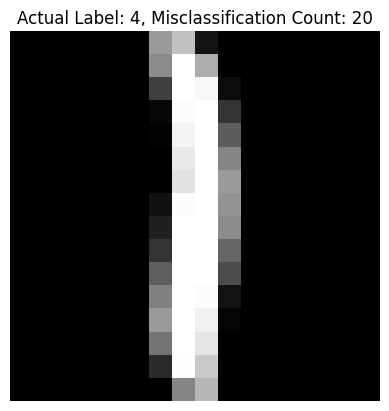

In [142]:
plt.title(f"Actual Label: {int(digits_data[topMisclassifiedIndices[0]])}, Misclassification Count: {int(misclassificationCountByDegStarOnAllData[topMisclassifiedIndices[0]])}")
plt.axis('off')
plt.imshow(pixels_data[topMisclassifiedIndices[0], :].reshape(16, 16), cmap='gray')

In [117]:
print(f"The number of times this image was misclassified: {misclassificationCountByDegStarOnAllData[topMisclassifiedIndices[0]]}")

The number of times this image was misclassified: 20.0


Second top misclassified image.

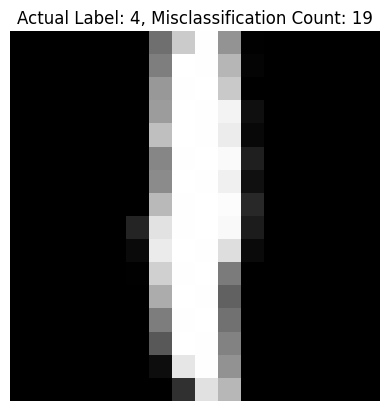

In [143]:
plt.title(f"Actual Label: {int(digits_data[topMisclassifiedIndices[1]])}, Misclassification Count: {int(misclassificationCountByDegStarOnAllData[topMisclassifiedIndices[1]])}")
plt.axis('off')
plt.imshow(pixels_data[topMisclassifiedIndices[1], :].reshape(16, 16), cmap='gray')

In [119]:
print(f"The number of times this image was misclassified: {misclassificationCountByDegStarOnAllData[topMisclassifiedIndices[1]]}")

The number of times this image was misclassified: 19.0


Third top misclassified image.

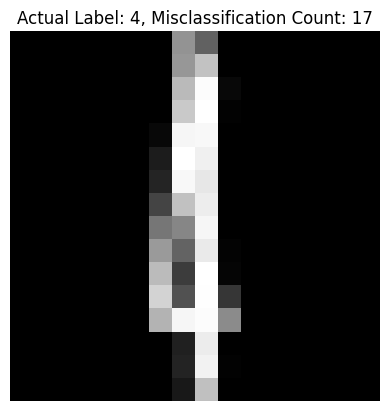

In [144]:
plt.title(f"Actual Label: {int(digits_data[topMisclassifiedIndices[2]])}, Misclassification Count: {int(misclassificationCountByDegStarOnAllData[topMisclassifiedIndices[2]])}")
plt.axis('off')
plt.imshow(pixels_data[topMisclassifiedIndices[2], :].reshape(16, 16), cmap='gray')

In [121]:
print(f"The number of times this image was misclassified: {misclassificationCountByDegStarOnAllData[topMisclassifiedIndices[2]]}")

The number of times this image was misclassified: 17.0


Fourth top misclassified image.

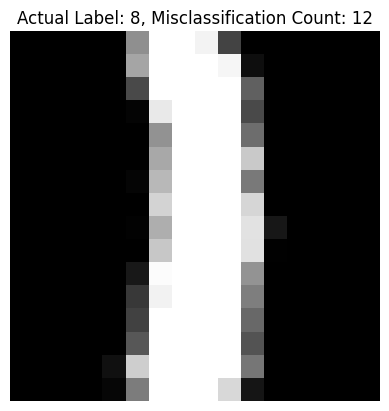

In [145]:
plt.title(f"Actual Label: {int(digits_data[topMisclassifiedIndices[3]])}, Misclassification Count: {int(misclassificationCountByDegStarOnAllData[topMisclassifiedIndices[3]])}")
plt.axis('off')
plt.imshow(pixels_data[topMisclassifiedIndices[3], :].reshape(16, 16), cmap='gray')

In [123]:
print(f"The number of times this image was misclassified: {misclassificationCountByDegStarOnAllData[topMisclassifiedIndices[3]]}")

The number of times this image was misclassified: 12.0


Fifth top misclassified image.

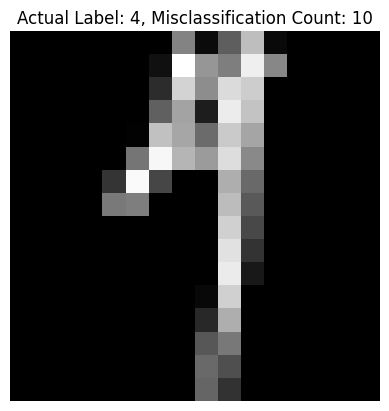

In [146]:
plt.title(f"Actual Label: {int(digits_data[topMisclassifiedIndices[4]])}, Misclassification Count: {int(misclassificationCountByDegStarOnAllData[topMisclassifiedIndices[4]])}")
plt.axis('off')
plt.imshow(pixels_data[topMisclassifiedIndices[4], :].reshape(16, 16), cmap='gray')

In [125]:
print(f"The number of times this image was misclassified: {misclassificationCountByDegStarOnAllData[topMisclassifiedIndices[4]]}")

The number of times this image was misclassified: 10.0
